In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import scipy.stats as si
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
import math
warnings.filterwarnings("ignore")

In [4]:
# Hyperparams
n_units = 400
layers = 4
n_batch = 4096
n_epochs = 10

In [5]:
call_df = pd.read_csv('../data.csv')


In [6]:
call_df.head()

,strike_price,best_bid,best_offer,date_ndiff,treasury_rate,closing_price,sigma_20
0,334.0,4.50,4.57,3,15.146374,333.84,0.3812
1,335.0,3.83,3.90,3,15.146374,333.84,0.3647
2,336.0,3.24,3.28,3,15.146374,333.84,0.3500
3,337.0,2.68,2.72,3,15.146374,333.84,0.3358
4,338.0,2.19,2.22,3,15.146374,333.84,0.3238


In [7]:
call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(call_df.drop(['best_bid', 'best_offer'], axis=1),
                                                                        (call_df.best_bid + call_df.best_offer) / 2,
                                                                        test_size=0.1, random_state=42)


In [8]:
model = Sequential()
model.add(Dense(n_units, input_dim=call_X_train.shape[1]))
model.add(LeakyReLU())

for _ in range(layers - 1):
    model.add(Dense(n_units))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer=Adam())

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               2400      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 batch_normalization (Batch  (None, 400)               1600      
 Normalization)                                                  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                        

In [10]:
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=n_epochs, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/10
10/10 [==============================] - 2s 104ms/step - loss: 340.0359 - val_loss: 462.6501
Epoch 2/10
10/10 [==============================] - 1s 85ms/step - loss: 156.8550 - val_loss: 1484.1031
Epoch 3/10
10/10 [==============================] - 1s 86ms/step - loss: 104.5253 - val_loss: 2774.4419
Epoch 4/10
10/10 [==============================] - 1s 91ms/step - loss: 70.4202 - val_loss: 1237.2570
Epoch 5/10
10/10 [==============================] - 1s 87ms/step - loss: 46.6134 - val_loss: 724.7144
Epoch 6/10
10/10 [==============================] - 1s 91ms/step - loss: 31.7630 - val_loss: 332.1360
Epoch 7/10
10/10 [==============================] - 1s 91ms/step - loss: 22.0264 - val_loss: 109.9750
Epoch 8/10
10/10 [==============================] - 1s 89ms/step - loss: 17.5786 - val_loss: 118.0805
Epoch 9/10
10/10 [==============================] - 1s 92ms/step - loss: 14.0404 - val_loss: 83.5505
Epoch 10/10
10/10 [==============================] - 1s 93ms/step - loss: 12

In [11]:
model.save('mlp1-call10.h5')

In [12]:
model.compile(loss='mse', optimizer=Adam(lr=1e-4))
history = model.fit(call_X_train, call_y_train, 
                    batch_size=4096, epochs=n_epochs, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/10
10/10 [==============================] - 2s 107ms/step - loss: 34.0127 - val_loss: 231.1247
Epoch 2/10
10/10 [==============================] - 1s 94ms/step - loss: 12.7933 - val_loss: 414.6224
Epoch 3/10
10/10 [==============================] - 1s 89ms/step - loss: 9.8285 - val_loss: 717.8323
Epoch 4/10
10/10 [==============================] - 1s 89ms/step - loss: 8.6671 - val_loss: 445.2102
Epoch 5/10
10/10 [==============================] - 1s 87ms/step - loss: 8.0078 - val_loss: 185.9191
Epoch 6/10
10/10 [==============================] - 1s 87ms/step - loss: 7.3641 - val_loss: 131.7411
Epoch 7/10
10/10 [==============================] - 1s 97ms/step - loss: 6.8731 - val_loss: 127.3797
Epoch 8/10
10/10 [==============================] - 1s 111ms/step - loss: 5.9878 - val_loss: 37.5333
Epoch 9/10
10/10 [==============================] - 1s 106ms/step - loss: 5.6768 - val_loss: 27.8693
Epoch 10/10
10/10 [==============================] - 1s 113ms/step - loss: 5.1201 - val_

In [13]:
model.save('mlp1-call20.h5')

In [14]:
model.compile(loss='mse', optimizer=Adam(lr=1e-5))
history = model.fit(call_X_train, call_y_train, 
                    batch_size=4096, epochs=10, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/10
10/10 [==============================] - 2s 101ms/step - loss: 24.5343 - val_loss: 157.0901
Epoch 2/10
10/10 [==============================] - 1s 89ms/step - loss: 8.8192 - val_loss: 182.3239
Epoch 3/10
10/10 [==============================] - 1s 88ms/step - loss: 6.6389 - val_loss: 53.8523
Epoch 4/10
10/10 [==============================] - 1s 94ms/step - loss: 5.6260 - val_loss: 51.1261
Epoch 5/10
10/10 [==============================] - 1s 89ms/step - loss: 5.2124 - val_loss: 32.6107
Epoch 6/10
10/10 [==============================] - 1s 101ms/step - loss: 4.8963 - val_loss: 25.9974
Epoch 7/10
10/10 [==============================] - 1s 101ms/step - loss: 4.6036 - val_loss: 14.9389
Epoch 8/10
10/10 [==============================] - 1s 106ms/step - loss: 5.0134 - val_loss: 7.4159
Epoch 9/10
10/10 [==============================] - 1s 112ms/step - loss: 4.5682 - val_loss: 9.2762
Epoch 10/10
10/10 [==============================] - 1s 98ms/step - loss: 4.3352 - val_loss: 1

In [15]:
model.save('mlp1-call30.h5')

In [16]:
model.compile(loss='mse', optimizer=Adam(lr=1e-6))
history = model.fit(call_X_train, call_y_train, 
                    batch_size=4096, epochs=10, 
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/10
10/10 [==============================] - 2s 122ms/step - loss: 16.3695 - val_loss: 43.1605
Epoch 2/10
10/10 [==============================] - 1s 108ms/step - loss: 6.8016 - val_loss: 75.3305
Epoch 3/10
10/10 [==============================] - 1s 108ms/step - loss: 4.9925 - val_loss: 26.0777
Epoch 4/10
10/10 [==============================] - 1s 109ms/step - loss: 4.5102 - val_loss: 71.4170
Epoch 5/10
10/10 [==============================] - 1s 106ms/step - loss: 3.9575 - val_loss: 24.4420
Epoch 6/10
10/10 [==============================] - 1s 101ms/step - loss: 3.9143 - val_loss: 15.4086
Epoch 7/10
10/10 [==============================] - 1s 100ms/step - loss: 3.6979 - val_loss: 25.0005
Epoch 8/10
10/10 [==============================] - 1s 106ms/step - loss: 3.7223 - val_loss: 46.7341
Epoch 9/10
10/10 [==============================] - 1s 99ms/step - loss: 3.7172 - val_loss: 27.9811
Epoch 10/10
10/10 [==============================] - 1s 98ms/step - loss: 3.5710 - val_loss

In [17]:
model.save('mlp1-call40.h5')

In [18]:
call_y_pred = model.predict(call_X_test)

141/141 [==============================] - 0s 2ms/step


In [19]:
diff = (call_y_test.values - call_y_pred.reshape(call_y_pred.shape[0]))

In [20]:
math.sqrt(np.mean(np.square(diff)))

4.4343519771195385

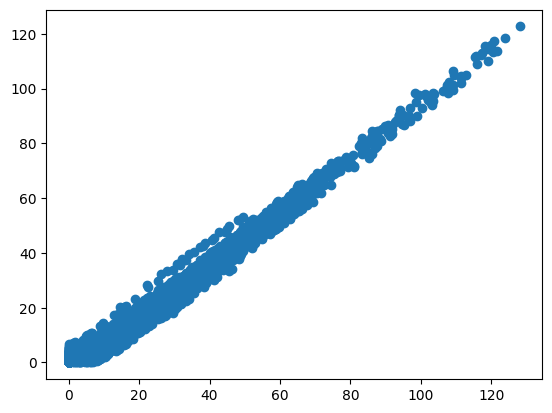

In [21]:
plt.plot(call_y_pred, np.array(call_y_test),'o')
plt.show()

In [22]:
def monte_carlo(S, K, T, r, sigma, I, option = 'call'):
    
    data = np.zeros((I, 2))
    z = np.random.normal(0, 1, [1, I])
    ST = S*np.exp(T*(r - 0.5*sigma**2)+sigma*math.sqrt(T)*z)
    data[:,1] = ST - K
    average = np.sum(np.amax(data, axis=1))/float(I)
    return np.exp(-r*T)*average

In [23]:
output = []
for i in range(call_X_test.shape[0]):
    output.append(monte_carlo(call_X_test.iloc[i][3], call_X_test.iloc[i][0], call_X_test.iloc[i][1]/1260, call_X_test.iloc[i][2]/100, call_X_test.iloc[i][4], 100000))

In [24]:
diff = call_y_test.values - output
math.sqrt(np.mean(np.square(diff)))

3.8627725743609997

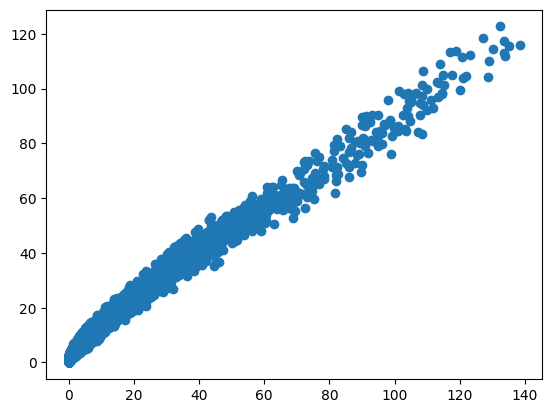

In [25]:
plt.plot(output, np.array(call_y_test),'o')
plt.show()

In [27]:
"""X1, X2, Y1, Y2 = train_test_split(call_X_test,call_y_test,test_size=0.5, random_state=42)
X11,X12,Y11,Y12 = train_test_split(X1,Y1,test_size=0.5, random_state=42)
X21,X22,Y21,Y22 = train_test_split(X2,Y2,test_size=0.5, random_state=42)
k = 100
p = 0
for j in range(1220,1240):
    output = []
    for i in range(X11.shape[0]):
        output.append(monte_carlo(X11.iloc[i][3], X11.iloc[i][0], X11.iloc[i][1]/j, X11.iloc[i][2]/100, X11.iloc[i][4], 100000))
    diff = (Y11.values - output)
    d = math.sqrt(np.mean(np.square(diff)))
    if d < k:
        k = d
        p = j
print("X11: "+  str(p) +" MSE: "+ str(k))
k = 100
p = 0
for j in range(1290,1310):
    output = []
    for i in range(X12.shape[0]):
        output.append(monte_carlo(X12.iloc[i][3], X12.iloc[i][0], X12.iloc[i][1]/j, X12.iloc[i][2]/100, X12.iloc[i][4], 100000))
    diff = (Y12.values - output)
    d = math.sqrt(np.mean(np.square(diff)))
    if d < k:
        k = d
        p = j
print("X12: "+  str(p) +" MSE: "+ str(k))
k = 100
p = 0
for j in range(1250,1270):
    output = []
    for i in range(X21.shape[0]):
        output.append(monte_carlo(X21.iloc[i][3], X21.iloc[i][0], X21.iloc[i][1]/j, X21.iloc[i][2]/100, X21.iloc[i][4], 100000))
    diff = (Y21.values - output)
    d = math.sqrt(np.mean(np.square(diff)))
    if d < k:
        k = d
        p = j
print("X21: "+  str(p) +" MSE: "+ str(k))
k = 100
p = 0
for j in range(1230,1250):
    output = []
    for i in range(X22.shape[0]):
        output.append(monte_carlo(X22.iloc[i][3], X22.iloc[i][0], X22.iloc[i][1]/j, X22.iloc[i][2]/100, X22.iloc[i][4], 100000))
    diff = (Y22.values - output)
    d = math.sqrt(np.mean(np.square(diff)))
    if d < k:
        k = d
        p = j
print("X22: "+  str(p) +" MSE: "+ str(k))
"""

'X1, X2, Y1, Y2 = train_test_split(call_X_test,call_y_test,test_size=0.5, random_state=42)\nX11,X12,Y11,Y12 = train_test_split(X1,Y1,test_size=0.5, random_state=42)\nX21,X22,Y21,Y22 = train_test_split(X2,Y2,test_size=0.5, random_state=42)\nk = 100\np = 0\nfor j in range(1220,1240):\n    output = []\n    for i in range(X11.shape[0]):\n        output.append(monte_carlo(X11.iloc[i][3], X11.iloc[i][0], X11.iloc[i][1]/j, X11.iloc[i][2]/100, X11.iloc[i][4], 100000))\n    diff = (Y11.values - output)\n    d = math.sqrt(np.mean(np.square(diff)))\n    if d < k:\n        k = d\n        p = j\nprint("X11: "+  str(p) +" MSE: "+ str(k))\nk = 100\np = 0\nfor j in range(1290,1310):\n    output = []\n    for i in range(X12.shape[0]):\n        output.append(monte_carlo(X12.iloc[i][3], X12.iloc[i][0], X12.iloc[i][1]/j, X12.iloc[i][2]/100, X12.iloc[i][4], 100000))\n    diff = (Y12.values - output)\n    d = math.sqrt(np.mean(np.square(diff)))\n    if d < k:\n        k = d\n        p = j\nprint("X12: "+  s

In [26]:
def euro_vanilla(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #q: rate of continuous dividend paying asset 
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
        
    return result

In [27]:
output = []
for i in range(call_X_test.shape[0]):
    output.append(euro_vanilla(call_X_test.iloc[i][3], call_X_test.iloc[i][0], call_X_test.iloc[i][1]/365, call_X_test.iloc[i][2]/100, call_X_test.iloc[i][4]))

In [28]:
diff = call_y_test.values - output
math.sqrt(np.mean(np.square(diff)))

22.41347489712282

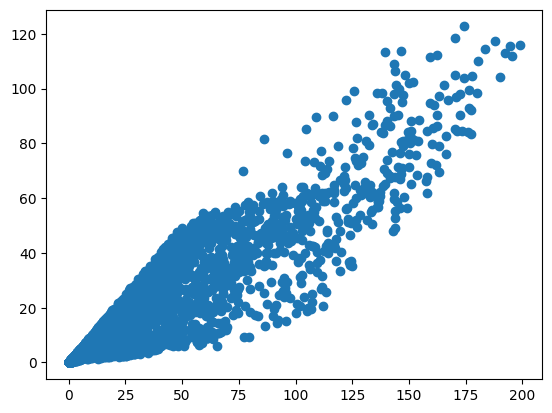

In [29]:
plt.plot(output, np.array(call_y_test),'o')
plt.show()